In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from primes import primesfrom2to

In [3]:
primes = primesfrom2to(10**7)

In [4]:
len(primes)

664579

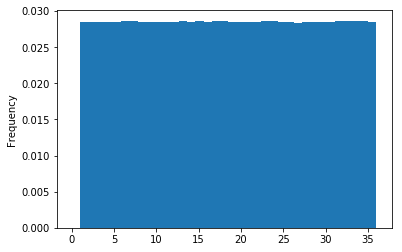

In [5]:
pd.Series(primes % 37).plot(kind='hist', bins=37, density=True)

In [7]:
N = 20
mods = pd.DataFrame(columns=primes[:N])
for p in primes[:N]:
    mods[p] = primes % p

In [8]:
k = primes[10]
a = mods.loc[mods[k].idxmin() + 1 :,[k]]
b = a.assign(cond=a.shift(-1)).dropna()
cnts = b.pivot_table(index='cond', columns=k, aggfunc='size')

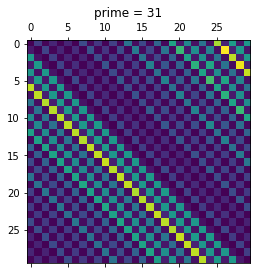

In [12]:
plt.matshow(cnts)
plt.suptitle('prime = ' + str(k));

In [13]:
cnts.fillna(0).head()

31,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
cond,,,,,,,,,,,,,,,,,,,,,
1.0,17,687,66,411,31,411,39,885,91,622,...,258,1819,186,1466,145,3326,372,2094,228,2034
2.0,270,17,776,59,403,27,493,29,980,79,...,2597,250,1867,164,1689,171,3817,367,2056,228
3.0,2066,190,12,723,45,424,38,406,39,884,...,92,2169,237,1902,214,1480,146,3432,339,2075
4.0,281,2084,189,17,773,55,515,41,411,37,...,1224,76,2462,244,2259,213,1467,142,3727,371
5.0,1991,198,2035,223,15,745,69,438,45,391,...,78,1177,110,2211,263,1870,197,1431,192,3495


In [14]:
distrs = b.assign(
    tmp=b.astype(float).diff(axis=1).iloc[:,-1],
    tmp1=b.apply(tuple, axis=1)
).groupby('tmp').tmp1.value_counts().sort_index()

In [15]:
distrs

tmp    tmp1       
-29.0  (30.0, 1.0)    2034
-28.0  (29.0, 1.0)     228
       (30.0, 2.0)     228
-27.0  (28.0, 1.0)    2094
       (29.0, 2.0)    2056
       (30.0, 3.0)    2075
-26.0  (27.0, 1.0)     372
       (28.0, 2.0)     367
       (29.0, 3.0)     339
       (30.0, 4.0)     371
-25.0  (26.0, 1.0)    3326
       (27.0, 2.0)    3817
       (28.0, 3.0)    3432
       (29.0, 4.0)    3727
       (30.0, 5.0)    3495
-24.0  (25.0, 1.0)     145
       (26.0, 2.0)     171
       (27.0, 3.0)     146
       (28.0, 4.0)     142
       (29.0, 5.0)     192
       (30.0, 6.0)     175
-23.0  (24.0, 1.0)    1466
       (25.0, 2.0)    1689
       (26.0, 3.0)    1480
       (27.0, 4.0)    1467
       (28.0, 5.0)    1431
       (29.0, 6.0)    1716
       (30.0, 7.0)    1409
-22.0  (23.0, 1.0)     186
       (24.0, 2.0)     164
                      ... 
 22.0  (7.0, 29.0)     659
       (8.0, 30.0)     645
 23.0  (1.0, 24.0)      91
       (2.0, 25.0)      69
       (3.0, 26.0)      93
       (4